In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
digits=load_digits()

In [2]:
print("Image data shape", digits.data.shape)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


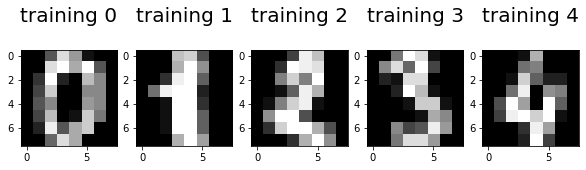

In [12]:
plt.figure(figsize=(10,8))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, label+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('training %i\n'%label, fontsize=20)

In [13]:
X_train,X_test, y_train, y_test=train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [20]:
X_train.shape

(1383, 64)

In [21]:
y_train.shape

(1383,)

In [22]:
X_test.shape

(414, 64)

In [23]:
y_test.shape

(414,)

In [26]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
logisticReg=LogisticRegression()
logisticReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#predicting for one image/observation
print(logisticReg.predict(X_test[0].reshape(1,-1)))

[4]


In [29]:
logisticReg.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [30]:
#predict for whole dataset
predictions=logisticReg.predict(X_test)

In [32]:
#find the accuracy
score=logisticReg.score(X_test,y_test)
score

0.9420289855072463

In [33]:
cm=metrics.confusion_matrix(y_test, predictions)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  1,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  3,  2,  0],
       [ 0,  2,  0,  0, 34,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  3, 28]])

Text(0.5, 1, 'Accuracy Score: 0.9420289855072463')

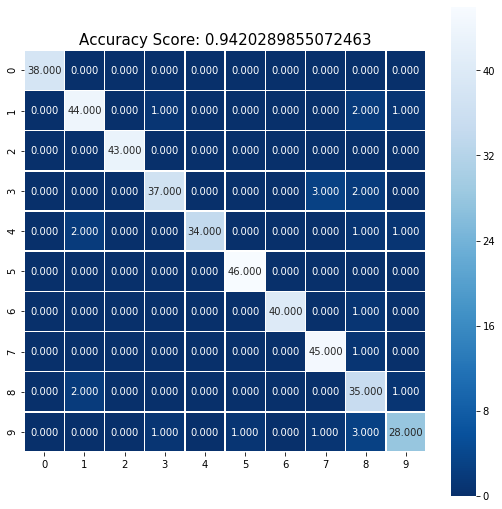

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f', linewidths=.5,square=True, cmap='Blues_r')
plt.ylabel('')
plt.xlabel('')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

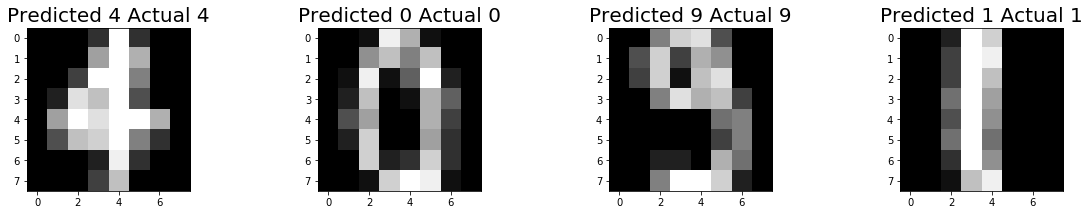

In [42]:
index=0
classifiedIndex=[]
for predict, actual in zip(predictions, y_test):
    if(predict==actual):
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title('Predicted {} Actual {}'.format(predictions[wrong],y_test[wrong]),fontsize=20)
    
    